In [61]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50

In [93]:
gen = ImageDataGenerator(
    validation_split=0.2
)

In [94]:
train_data = gen.flow_from_directory(
    './data/train-r',  
    target_size=(32, 32),
    batch_size=32,
    subset='training',
    class_mode='categorical'
)

Found 31368 images belonging to 43 classes.


In [95]:
val_data = gen.flow_from_directory(
    './data/train-r',
    target_size=(32, 32),
    batch_size=32, 
    subset='validation',
    class_mode='categorical'
)

Found 7841 images belonging to 43 classes.


In [96]:
base_model = ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(32, 32, 3)
)

In [97]:
base_model.trainable = False

In [98]:
for layer in base_model.layers[:-8]:
    layer.trainable = False

In [99]:
def make_model(learning_rate, droprate):
    x = base_model.output
    x = keras.layers.GlobalAveragePooling2D()(x)
    x = keras.layers.Dropout(rate=0.5)(x)
    x = keras.layers.Dense(128, activation='relu')(x)
    x = keras.layers.Dropout(rate=0.5)(x)
    predictions = keras.layers.Dense(43, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=predictions)

    optimizer = keras.optimizers.Adam()
    
    loss = keras.losses.CategoricalCrossentropy()
    
    # Compile model
    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    
    return model

In [100]:
checkpoint = keras.callbacks.ModelCheckpoint (
    "./checkpoints/traffic_sign_classification_resnet_{epoch:02d}_{val_accuracy:.3f}.keras",
    save_best_only=True,
    monitor="val_accuracy"
)

In [101]:
model = make_model(learning_rate=0.0001, droprate=0.8)

In [102]:
model.fit(train_data, epochs=100, validation_data=val_data, callbacks=[checkpoint])

Epoch 1/100
981/981 ━━━━━━━━━━━━━━━━━━━━ 31s 22ms/step - accuracy: 0.1672 - loss: 3.6325 - val_accuracy: 0.3437 - val_loss: 2.1378
Epoch 2/100
981/981 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.3210 - loss: 2.1954 - val_accuracy: 0.3577 - val_loss: 2.0557
Epoch 3/100
981/981 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.3737 - loss: 1.9589 - val_accuracy: 0.3747 - val_loss: 1.9722
Epoch 4/100
981/981 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.4000 - loss: 1.8651 - val_accuracy: 0.3614 - val_loss: 2.0041
Epoch 5/100
981/981 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.4241 - loss: 1.7867 - val_accuracy: 0.3718 - val_loss: 1.9742
Epoch 6/100
981/981 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.4395 - loss: 1.7374 - val_accuracy: 0.3670 - val_loss: 1.9929
Epoch 7/100
981/981 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.4448 - loss: 1.6894 - val_accuracy: 0.3809 - val_loss: 1.9877
Epoch 8/100
981/981 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.4498 - loss: 1

In [13]:
classes = [
'Speed limit (20km/h)',
'Speed limit (30km/h)',
'Speed limit (50km/h)',
'Speed limit (60km/h)',
'Speed limit (70km/h)',
'Speed limit (80km/h)',
'End of speed limit (80km/h)',
'Speed limit (100km/h)',
'Speed limit (120km/h)',
'No passing',
'No passing for vehicles over 3.5 metric tons',
'Right-of-way at the next intersection',
'Priority road',
'Yield',
'Stop',
'No vehicles',
'Vehicles over 3.5 metric tons prohibited',
'No entry',
'General caution',
'Dangerous curve to the left',
'Dangerous curve to the right',
'Double curve',
'Bumpy road',
'Slippery road',
'Road narrows on the right',
'Road work',
'Traffic signals',
'Pedestrians',
'Children crossing',
'Bicycles crossing',
'Beware of ice/snow',
'Wild animals crossing',
'End of all speed and passing limits',
'Turn right ahead',
'Turn left ahead',
'Ahead only',
'Go straight or right',
'Go straight or left',
'Keep right',
'Keep left',
'Roundabout mandatory',
'End of no passing',
'End of no passing by vehicles over 3.5 metric'
]

In [38]:
from tensorflow import keras

In [39]:
model = keras.models.load_model('traffic_sign_classification_v2_99_0.813.keras')

In [40]:
from tensorflow.keras.preprocessing.image import load_img
import numpy as np
from tensorflow.keras.applications.resnet import preprocess_input

In [41]:
path = './data/Test/00002.png'

In [42]:
img = load_img(path, target_size=(32,32))

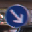

In [43]:
img

In [44]:
x = np.array(img)
X = np.array([x])
X = preprocess_input(X)

In [45]:
pred = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


In [46]:
class_num = pred[0].argmax()
class_name = classes[class_num]

In [47]:
class_num, class_name

(np.int64(23), 'Slippery road')